<a href="https://colab.research.google.com/github/Arjun-P-Dinesh/2348506_Lab5/blob/main/2348506_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.shape

(7043, 21)

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df1=df[['OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract']]
df1

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Yes,No,No,No,No,Month-to-month
1,No,Yes,No,No,No,One year
2,Yes,No,No,No,No,Month-to-month
3,No,Yes,Yes,No,No,One year
4,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year
7039,Yes,Yes,No,Yes,Yes,One year
7040,No,No,No,No,No,Month-to-month
7041,No,No,No,No,No,Month-to-month


In [20]:
df=df.drop(columns=["customerID"])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
def cat (df):
  categorical_variables=[]
  for call in df.columns:
    if df[call].dtype=="object":
      categorical_variables.append(call)
  return categorical_variables
cat(df)

cv=cat(df)
print(cv)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [22]:
le=LabelEncoder()
for col in cv:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [25]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=4e95ccb127a65fe523372584fb411dbc3236308f9d96b5da80d2a2ccf8bc5eeb
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

In [27]:
df["monthly_charges_fraction"] = df["MonthlyCharges"] / df["TotalCharges"]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_charges_fraction
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,2505,0,0.011916
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1466,0,0.038847
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,157,1,0.342994
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1400,0,0.030214
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,925,1,0.076432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1597,0,0.053100
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,5698,0,0.018112
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,2994,0,0.009886
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,2660,1,0.027970


In [29]:
df=df.drop(columns='MonthlyCharges')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,monthly_charges_fraction
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505,0,0.011916
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1466,0,0.038847
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,157,1,0.342994
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1400,0,0.030214
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,925,1,0.076432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,1597,0,0.053100
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,5698,0,0.018112
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,2994,0,0.009886
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,2660,1,0.027970


In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn', 'monthly_charges_fraction'],
      dtype='object')

In [34]:
df1=df.drop(columns=['Churn','monthly_charges_fraction'])

features=df1


In [35]:
labels=df['Churn']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [37]:
model = LogisticRegression(solver = 'saga', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [40]:
#Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7998580553584103


In [41]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6894736842105263


In [43]:
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.3700564971751412


In [44]:
# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.4816176470588236


In [45]:
# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.6570661632795137


In [46]:
# Calculate the Cohen's kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa score:", kappa)

Cohen's kappa score: 0.3712767573452156


In [47]:
matthews = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", matthews)

Matthews correlation coefficient: 0.39889798120695763


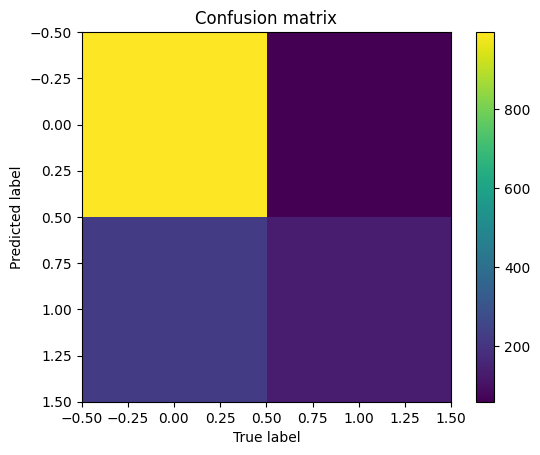

In [56]:
from sklearn.metrics import confusion_matrix

# Get the true labels and the predicted labels
true_labels, predicted_labels = y_test, model.predict(X_test)

# Create the confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.imshow(confusion_matrix, cmap="viridis")
plt.colorbar()
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion matrix")
plt.show()

In [57]:
confusion_matrix #it is a good model with tp=996 and fn=131

array([[996,  59],
       [223, 131]])

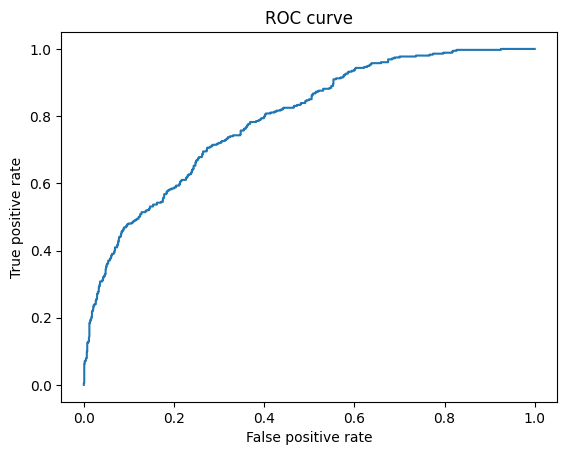

AUC: 0.7922738104800922


In [58]:
from sklearn.metrics import roc_curve, auc

predicted_probabilities=model.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

# Calculate the AUC
auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()

print("AUC:", auc)